### Bank Term Deposit Subscription

**About dataset:**The dataset is from a bank, using which we have to predict whether the subject subscribes to a term deposit or not.<br/>

**Attributes:**
The dataset has the following attributes:<br/>
1  - age (numeric)<br/>
2  - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                    "blue-collar","self-employed","retired","technician","services"). <br/>
3  - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br/>
4  - education (categorical: "unknown","secondary","primary","tertiary")<br/>
5  - default: has credit in default? (binary: "yes","no")<br/>
6  - balance: average yearly balance, in euros (numeric) <br/>
7  - housing: has housing loan? (binary: "yes","no")<br/>
8  - loan: has personal loan? (binary: "yes","no")<br/>
9  - contact: contact communication type (categorical: "unknown","telephone","cellular") <br/>
10 - day: last contact day of the month (numeric)<br/>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br/>
12 - duration: last contact duration, in seconds (numeric)<br/>
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br/>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client      was not previously contacted)<br/>  
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br/>
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br/>
**Response Variable (desired target):**<br/>
17 - y - has the client subscribed to a __term deposit?__ (binary: "yes","no")

**Importing packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
import os
os.getcwd()

'C:\\Users\\xsmaddurve\\Downloads\\Chaitanya_Pratice\\Logistic_Regression'

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
bank_data = pd.read_csv("attachment_bank.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Top 6 rows of dataset

**Let's see the datatypes of the variables**

In [4]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [63]:
bank_data['age'].mode()

0    34
dtype: int64

**Observations:** <br/>
No. of rows: 4521, No.of columns: 17
        

### Question: Perform Descriptive Statistics on the dataset

In [7]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Question: Remove missing values from the data frame if any

In [8]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Question: Perform EDA and find any correlation

# correlation

In [9]:
bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


<Figure size 720x360 with 0 Axes>

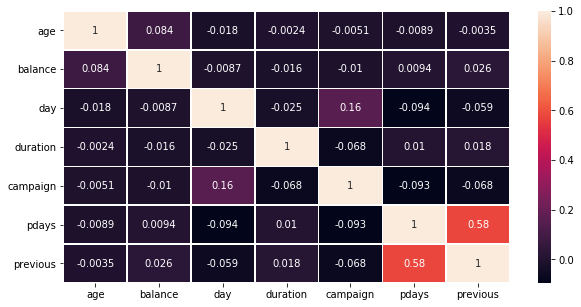

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(bank_data.corr(), annot=True, linewidths=.5,)

Observations: From the above plot, it is evident that previous and pdays of Bedrooms are correlated to each other.

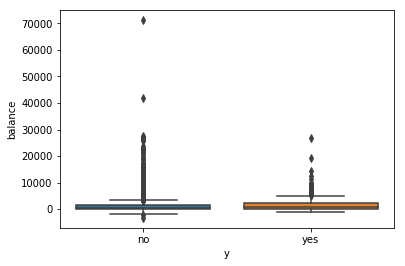

In [11]:
sns.boxplot(x='y', y='balance', data=bank_data)
plt.show()

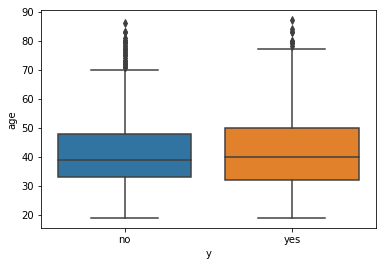

In [12]:
sns.boxplot(x='y', y='age', data=bank_data)
plt.show()

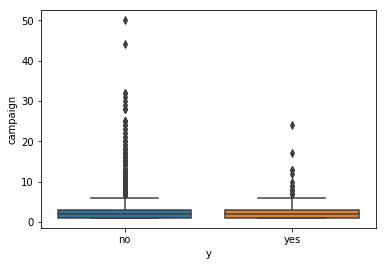

In [13]:
sns.boxplot(x='y', y='campaign', data=bank_data)
plt.show()

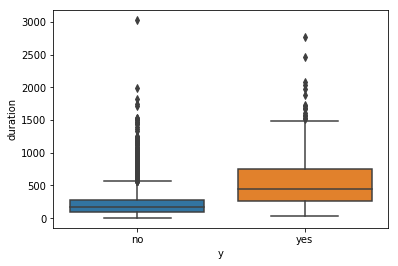

In [14]:
sns.boxplot(x='y', y='duration', data=bank_data)
plt.show()

In [15]:
# Relation between y and default

pd.crosstab(bank_data['default'], bank_data['y'], rownames=['Default'], colnames=['Y'])

Y,no,yes
Default,,
no,3933,512
yes,67,9


In [16]:
# Relation between y and housing

pd.crosstab(bank_data['housing'], bank_data['y'], rownames=['housing'], colnames=['Y'])

Y,no,yes
housing,,
no,1661,301
yes,2339,220


In [17]:
# Relation between y and loan

pd.crosstab(bank_data['loan'], bank_data['y'], rownames=['loan'], colnames=['Y'])

Y,no,yes
loan,,
no,3352,478
yes,648,43


In [18]:
y_dummies = pd.get_dummies(bank_data.y, prefix='y', drop_first= False)
bank_data = pd.concat([bank_data, y_dummies], axis=1)
y_dummies = pd.get_dummies(bank_data.job, prefix='job', drop_first= False)
bank_data = pd.concat([bank_data, y_dummies], axis=1)
y_dummies = pd.get_dummies(bank_data.marital, prefix='marital', drop_first= False)
bank_data = pd.concat([bank_data, y_dummies], axis=1)
y_dummies = pd.get_dummies(bank_data.education, prefix='education', drop_first= False)
bank_data = pd.concat([bank_data, y_dummies], axis=1)
y_dummies = pd.get_dummies(bank_data.default, prefix='default', drop_first= False)
bank_data = pd.concat([bank_data, y_dummies], axis=1)
y_dummies = pd.get_dummies(bank_data.housing, prefix='housing', drop_first= False)
bank_data = pd.concat([bank_data, y_dummies], axis=1)
y_dummies = pd.get_dummies(bank_data.loan, prefix='loan', drop_first= False)
bank_data = pd.concat([bank_data, y_dummies], axis=1)
y_dummies = pd.get_dummies(bank_data.poutcome, prefix='poutcome', drop_first= False)
bank_data = pd.concat([bank_data, y_dummies], axis=1)
y_dummies = pd.get_dummies(bank_data.contact, prefix='contact', drop_first= False)
bank_data = pd.concat([bank_data, y_dummies], axis=1)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,1,0,0,0,0,1,1,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,1,0,1,1,0,0,0,1,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,1,1,0,1,0,0,0,1,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,1,0,1,0,0,0,1,0,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,1,1,0,0,0,0,1,0,0,1


In [19]:
# bank_data['log_duration'] = np.log(bank_data['duration'])

In [20]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,1,0,0,0,0,1,1,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,1,0,1,1,0,0,0,1,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,1,1,0,1,0,0,0,1,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,1,0,1,0,0,0,1,0,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,1,1,0,0,0,0,1,0,0,1


In [21]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous,y_no,y_yes,job_admin.,...,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.884760,0.115240,0.105729,...,0.566025,0.847158,0.152842,0.108383,0.043574,0.028534,0.819509,0.640566,0.066578,0.292856
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347,0.319347,0.307524,...,0.495676,0.359875,0.359875,0.310898,0.204169,0.166510,0.384638,0.479888,0.249318,0.455123
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
bank_data.corr()
plt.figure(figsize=(15,20))
sns.heatmap(bank_data.corr(), annot=True, linewidths=.5,)

,age,balance,day,duration,campaign,pdays,previous,y_no,y_yes,job_admin.,...,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,-0.045092,0.045092,-0.048385,...,-0.193888,0.011250,-0.011250,0.012693,-0.026179,0.048626,-0.017414,-0.061794,0.183060,-0.035125
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,-0.017905,0.017905,-0.022386,...,-0.050227,0.071349,-0.071349,0.025719,0.000129,0.029999,-0.033843,0.000240,0.034025,-0.018892
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,0.011244,-0.011244,0.017052,...,-0.031291,0.004879,-0.004879,-0.064235,-0.021062,-0.027720,0.075100,0.017850,0.053527,-0.048143
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,-0.401118,0.401118,-0.038763,...,0.015740,0.004997,-0.004997,-0.012852,0.008109,0.049255,-0.015239,0.016191,-0.021180,-0.005469
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,0.061147,-0.061147,-0.017895,...,-0.003574,-0.017120,0.017120,-0.094021,-0.030435,-0.058268,0.117375,-0.018435,0.026571,0.004882
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,-0.104087,0.104087,0.035127,...,0.116893,0.031086,-0.031086,0.708380,0.382970,0.212188,-0.867713,0.223347,0.019660,-0.246270
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,-0.116714,0.116714,0.020665,...,0.038621,0.022115,-0.022115,0.475289,0.358382,0.250277,-0.682746,0.167604,0.031797,-0.194142
y_no,-0.045092,-0.017905,0.011244,-0.401118,0.061147,-0.104087,-0.116714,1.000000,-1.000000,-0.006568,...,0.104683,-0.070517,0.070517,-0.014556,-0.051908,-0.283481,0.162038,-0.118761,-0.025878,0.139399
y_yes,0.045092,0.017905,-0.011244,0.401118,-0.061147,0.104087,0.116714,-1.000000,1.000000,0.006568,...,-0.104683,0.070517,-0.070517,0.014556,0.051908,0.283481,-0.162038,0.118761,0.025878,-0.139399
job_admin.,-0.048385,-0.022386,0.017052,-0.038763,-0.017895,0.035127,0.020665,-0.006568,0.006568,1.000000,...,0.045632,-0.035866,0.035866,0.016644,0.018222,0.040445,-0.040635,0.014706,-0.002379,-0.014203


<Figure size 1080x1440 with 0 Axes>

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function flush_figures at 0x0000023EC5477620> (for post_execute):
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py", line 88, in trigger
    func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py", line 117, in flush_figures
    return show(True)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py", line 39, in show
    metadata=_fetch_figure_metadata(figure_manager.canvas.figure)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py", line 304, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\formatters.py", line 180, in format
    data = formatter(obj)
  File "<decorator-gen-9>", line 2, in __call__
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\formatters.py", line 224, in catch_format_e

KeyboardInterrupt: 

In [23]:
corre = bank_data.corr()
X = corre['y_yes'][corre['y_yes'].between(0.1,0.7)].index

In [24]:
corre['y_yes'].dtype

dtype('float64')

In [25]:
# bank_data.apply(np.)
import scipy
print(scipy.stats.describe(bank_data['balance'], axis=None))

DescribeResult(nobs=4521, minmax=(-3313, 71188), mean=1422.6578190665782, variance=9057921.748594267, skewness=6.5942417478272635, kurtosis=88.29128025001411)


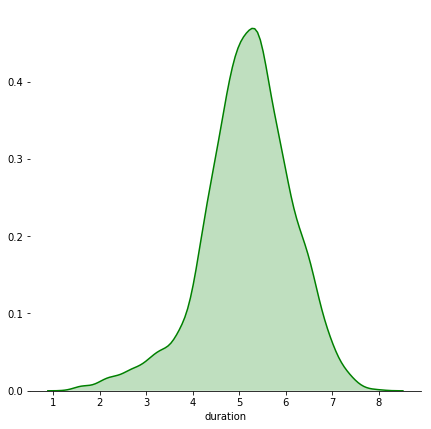

In [26]:
f = plt.subplots( figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(bank_data['duration']), hist=False, color="g", kde_kws={"shade": True})


In [27]:
X_columns =X.append(corre['y_yes'][ corre['y_yes'].between(-0.1,-0.7)].index)

In [28]:
X = bank_data[X_columns]
X.drop(['pdays', 'previous'], axis=1, inplace=True)
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,duration,housing_no,poutcome_success,contact_cellular
0,79,1,0,1
1,220,0,0,1
2,185,0,0,1
3,199,0,0,0
4,226,0,0,0


In [29]:
y = bank_data['y_yes']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y_yes, dtype: uint8

## Question: Perform classification using Logistic Regression and analyse the metrics

### 1. Split the dataset into train n test

In [30]:
# splitting the data into train and test with 70:30 ratio

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=62)

# 2. Intiation of the model 

In [31]:
# Building logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=0.6)

# 3. Fit the Model 

In [32]:
# fitting logistic regression model with x and y attributes of train data
logreg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_train.head()

263     0
3566    0
2536    0
3637    0
991     1
Name: y_yes, dtype: uint8

In [34]:
x_train.head()

,duration,housing_no,poutcome_success,contact_cellular
263,180,1,0,1
3566,5,0,0,1
2536,52,1,0,1
3637,113,0,0,0
991,124,0,0,1


# 4. Predict the Model

In [35]:
# now applying our learnt model on test and also on train data

y_pred_test = logreg.predict(x_test)
y_pred_train = logreg.predict(x_train)

# 5.Evaluate the model

In [36]:
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

Test Accuracy:  0.887988209285188


In [37]:
# comparing the metrics of predicted lebel and real label of test data
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))

Train Accuracy:  0.9017067003792667


In [38]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_pred_test)
conf

array([[1167,   17],
       [ 135,   38]], dtype=int64)

In [39]:
# Actual Values of y_test
y_test.value_counts()

0    1184
1     173
Name: y_yes, dtype: int64

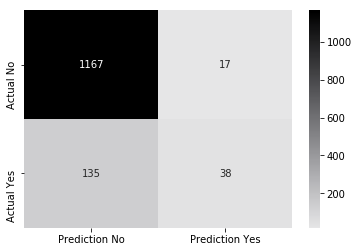

In [40]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [41]:

cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1184
           1       0.69      0.22      0.33       173

   micro avg       0.89      0.89      0.89      1357
   macro avg       0.79      0.60      0.64      1357
weighted avg       0.87      0.89      0.86      1357



# Approach 2 

In [42]:
bank_data = pd.read_csv("attachment_bank.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [43]:
from  sklearn.preprocessing import LabelEncoder
encoding_list = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
bank_data[encoding_list] = bank_data[encoding_list].apply(LabelEncoder().fit_transform)

In [44]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EC9EE96A0>,
      dtype=object)

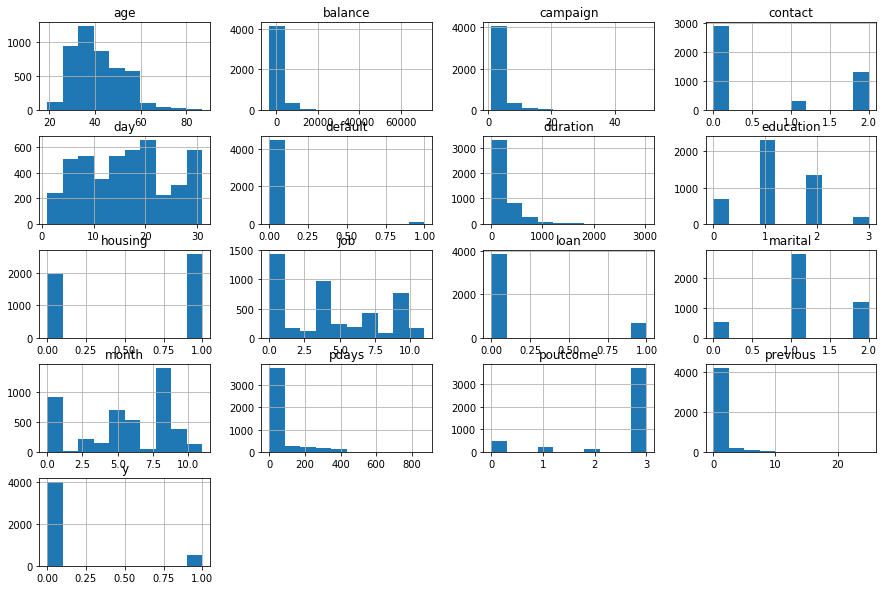

In [45]:
bank_data.hist(bins=10, figsize=(15,10))
plt.show()

In [46]:
Y= bank_data['y']
X= bank_data.drop('y', axis=1)


In [47]:
Y.head()
X.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3


# Question: Perform classification using Logistic Regression and analyse the metrics

### 1. Split the dataset into train n test

In [48]:
# splitting the data into train and test with 70:30 ratio

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=62)

## 2. Intiation of the model 

In [49]:
# Building logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=0.6)

## 3. Fit the Model 

In [50]:
# fitting logistic regression model with x and y attributes of train data
logreg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
y_train.head()

263     0
3566    0
2536    0
3637    0
991     1
Name: y, dtype: int32

In [52]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
263,53,2,1,2,0,624,0,1,0,21,5,180,4,-1,0,3
3566,35,7,1,1,0,181,1,0,0,31,5,5,3,-1,0,3
2536,56,2,0,0,0,29,0,0,0,29,4,52,2,227,1,0
3637,60,5,1,1,0,78,1,0,2,12,8,113,3,-1,0,3
991,37,0,1,2,0,3913,1,0,0,27,0,124,1,-1,0,3


## 4. Predict the Model

In [53]:
# now applying our learnt model on test and also on train data

y_pred_test = logreg.predict(x_test)
y_pred_train = logreg.predict(x_train)

## 5.Evaluate the model

In [54]:
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

Test Accuracy:  0.8850405305821666


In [55]:
# comparing the metrics of predicted lebel and real label of test data
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))

Train Accuracy:  0.8925410872313527


In [56]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_pred_test)
conf

array([[1166,   18],
       [ 138,   35]], dtype=int64)

In [57]:
# Actual Values of y_test
y_test.value_counts()

0    1184
1     173
Name: y, dtype: int64

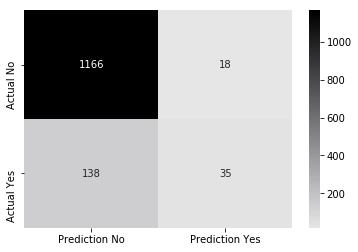

In [58]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [59]:

cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1184
           1       0.66      0.20      0.31       173

   micro avg       0.89      0.89      0.89      1357
   macro avg       0.78      0.59      0.62      1357
weighted avg       0.86      0.89      0.86      1357



In [60]:
# np.sum(titanic_data)
def var_summary(df):
    '''
    To do unique values, Range
    '''
    
    index_df = ["Count", 'Sum', "Mean", "Median", "Mode", "Std", "Min",  "P1", "P5", "P10", "P25", "P50", "P75", "P90", "P95", "P99", "P99.5", "Max"]
    values = [df.count(), df.sum(), df.mean(), df.median(), df.mode(),  df.std(), df.min(),  df.quantile(0.01, axis = 0) , df.quantile(0.05, axis = 0),
              df.quantile(0.1, axis = 0),df.quantile(0.25, axis = 0), df.quantile(0.5, axis = 0), df.quantile(0.75, axis = 0), df.quantile(0.9, axis = 0), 
              df.quantile(0.95, axis = 0), df.quantile(0.99, axis = 0), df.quantile(0.995, axis = 0), df.max() ]
#     print (len(index_df))
    print(values)
#     print(df.columns)
    new_df = pd.DataFrame(values, index = index_df, columns = df.columns)
    return new_df

In [61]:
bank_data.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34,4,1,1,0,0,1,0,0,20,8,123,1,-1,0,3,0
